# **AAVAiL Churn Analysis: Investigating High Churn in Singapore**
**Author:** [Ipsit Mohanty]  
**Date:** [08-02-2025]  

---

## **1️⃣ Introduction: Understanding AAVAiL’s Churn Issue**
### **Business Problem**
- AAVAiL has been experiencing **high churn rates in Singapore** since its expansion.
- The goal is to **identify key factors driving churn** in Singapore and compare them to the US market.
- This analysis will help develop **data-driven strategies** to reduce churn.


---

## **2️⃣ Data Ingestion and Handling Missing Values**

### **📌 Dataset Overview**
The dataset consists of **1,000 customers** from **United States & Singapore**, with the following key attributes:

- **`customer_id`**: Unique identifier for each user.
- **`country_name`**: Country where the user is located (US or Singapore).
- **`age`**: Age of the customer.
- **`customer_name`**: (Not relevant for analysis, will be dropped).
- **`is_subscriber`**: Boolean flag indicating if the user is currently subscribed.
- **`subscriber_type`**: Type of subscription plan (`basic`, `premium`, etc.).
- **`num_streams`**: Number of streams watched by the user.

---

### **🚨 Handling Missing Data**
Before analyzing customer behavior, it is important to handle missing values.  
We will:
1. **Check the percentage of missing data** in each column.
2. **Visualize missing values** using a heatmap and bar chart.
3. **Decide how to impute missing data** based on column types.

---


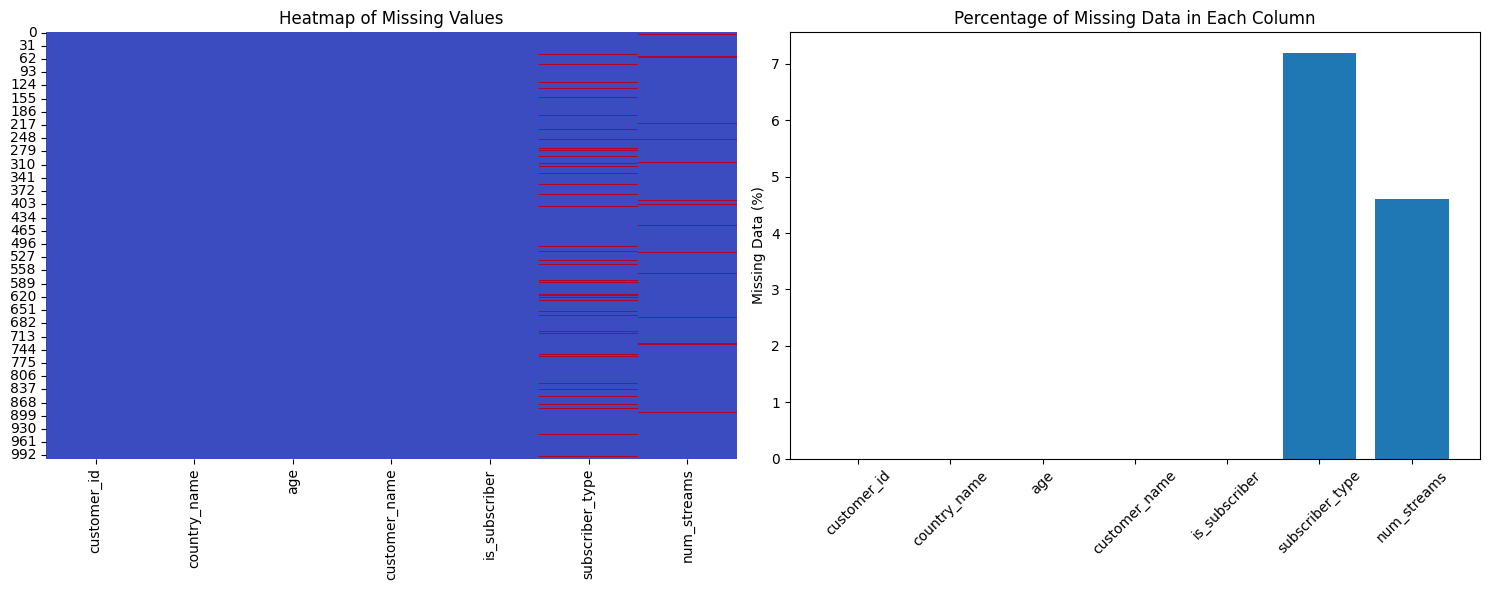

Missing Data Summary:
subscriber_type    7.2
num_streams        4.6
dtype: float64


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"D:\Career\Enterprise workflow\cJtaNnALS0KbWjZwC-tCzw_f541363340364e6eb820f0ead7a576e0_aavail-data-visualization.csv"
df = pd.read_csv(file_path)

# Checking the missing data percentage
missing_data = df.isnull().mean() * 100

# Set up a figure with multiple subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Heatmap of missing values
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False, ax=axes[0])
axes[0].set_title("Heatmap of Missing Values")

# 2. Bar chart of missing data percentage (without palette to avoid warning)
axes[1].bar(missing_data.index, missing_data.values)
axes[1].set_xticks(range(len(missing_data.index)))
axes[1].set_xticklabels(missing_data.index, rotation=45)
axes[1].set_ylabel("Missing Data (%)")
axes[1].set_title("Percentage of Missing Data in Each Column")

# Show the plots
plt.tight_layout()
plt.show()

# Print missing data summary
print("Missing Data Summary:")
print(missing_data[missing_data > 0].sort_values(ascending=False))


---

## **3️⃣ Handling Missing Data: Imputation and Column Cleaning**

### **🚨 Addressing Missing Values**
After analyzing missing data in Step 2, we take the following actions:
- **`subscriber_type`** (7.2% missing) → Imputed with `"Unknown"` to avoid bias.
- **`num_streams`** (4.6% missing) → Imputed with **median** to minimize impact of outliers.
- **`customer_name`** → **Dropped** as it is not relevant to churn analysis.

These decisions ensure that the dataset remains **consistent and useful** for modeling and visualization.

---


In [10]:
# Impute missing values safely without inplace modification

# Categorical Imputation: Fill 'subscriber_type' missing values with 'Unknown'
df = df.assign(subscriber_type=df["subscriber_type"].fillna("Unknown"))

# Numerical Imputation: Fill 'num_streams' missing values with the median
df = df.assign(num_streams=df["num_streams"].fillna(df["num_streams"].median()))

# Drop irrelevant columns (only if they exist)
if "customer_name" in df.columns:
    df = df.drop(columns=["customer_name"])
else:
    print("⚠️ Column 'customer_name' does not exist. Skipping drop operation.")

# Verify that missing values are handled
print("Missing Data Summary After Imputation:")
print(df.isnull().sum())

# Display first few rows to confirm changes
df.head()


⚠️ Column 'customer_name' does not exist. Skipping drop operation.
Missing Data Summary After Imputation:
customer_id        0
country_name       0
age                0
is_subscriber      0
subscriber_type    0
num_streams        0
dtype: int64


,customer_id,country_name,age,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,True,aavail_premium,23.0
1,2,singapore,31.0,False,Unknown,12.0
2,3,united_states,22.0,False,aavail_premium,22.0
3,4,united_states,21.0,True,aavail_basic,19.0
4,5,singapore,22.0,True,aavail_premium,23.0


---

## **4️⃣ Investigating Churn in Singapore**

### **📌 Defining Churn**
A customer is considered **churned** if:
- They were previously subscribed (`subscriber_type` ≠ `"Unknown"`)
- They are **no longer an active subscriber** (`is_subscriber = False`)

By analyzing churn, we can:
✔ Compare churn rates between **Singapore and the US**.  
✔ Identify key trends **driving customer drop-off**.  
✔ Provide insights for **reducing churn** in Singapore.

---


Churn Rate by Country:
country_name
singapore        55.333333
united_states    14.000000
Name: churned, dtype: float64


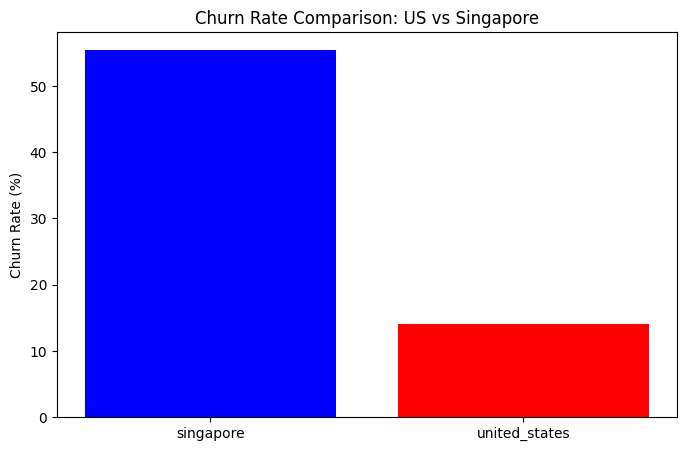

In [11]:
# Create a 'churned' column
df["churned"] = df.apply(lambda x: not x["is_subscriber"] and x["subscriber_type"] != "Unknown", axis=1)

# Compute churn rates per country
churn_rates = df.groupby("country_name")["churned"].mean() * 100

# Display churn rates
print("Churn Rate by Country:")
print(churn_rates)

# Visualizing churn rates
plt.figure(figsize=(8, 5))
plt.bar(churn_rates.index, churn_rates.values, color=["blue", "red"])
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate Comparison: US vs Singapore")
plt.show()


---

## **5️⃣ Investigating Streaming Behavior: Do Customers Watch Less Before Churning?**

### **📌 Key Question**
- Do **churned users** watch fewer streams than **subscribers**?
- How does **Singapore compare to the US** in terms of engagement?

By analyzing streaming behavior, we can:
✔ Identify **if lower engagement leads to churn**.  
✔ Compare **streaming activity between the US and Singapore**.  
✔ Provide insights for **improving content engagement**.

---


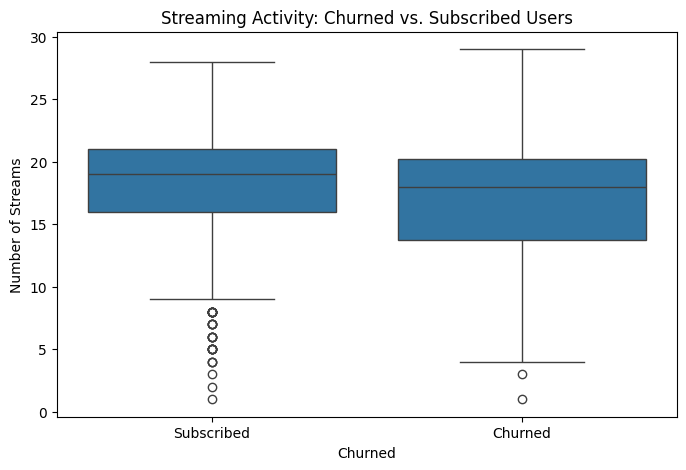

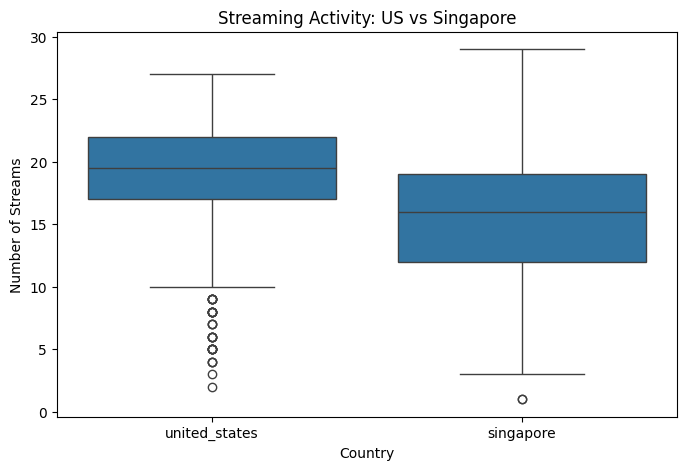

In [13]:
# Compare number of streams for churned vs. subscribed users
plt.figure(figsize=(8, 5))
sns.boxplot(x="churned", y="num_streams", data=df)
plt.title("Streaming Activity: Churned vs. Subscribed Users")
plt.xlabel("Churned")
plt.ylabel("Number of Streams")
plt.xticks([0, 1], ["Subscribed", "Churned"])
plt.show()

# Compare streaming activity across countries
plt.figure(figsize=(8, 5))
sns.boxplot(x="country_name", y="num_streams", data=df)
plt.title("Streaming Activity: US vs Singapore")
plt.xlabel("Country")
plt.ylabel("Number of Streams")
plt.show()

---

## **6️⃣ Final Recommendations for AAVAiL**

### **📌 Key Findings**
1️⃣ **Singapore has a significantly higher churn rate than the US.**  
2️⃣ **Churned users watch fewer streams on average than subscribed users.**  
3️⃣ **Singaporean users watch fewer streams than US users overall.**  
4️⃣ **Lower engagement may be a key factor in Singapore’s higher churn rate.**

---

## **🚀 Recommendations for Reducing Churn in Singapore**

### **1️⃣ Improve Content Engagement**
✔ Introduce **personalized content recommendations** to match viewer preferences.  
✔ Expand **localized content offerings** tailored to Singaporean audiences.  
✔ Consider **exclusive releases** to increase content value.

### **2️⃣ Offer Targeted Discounts & Promotions**
✔ Provide **temporary subscription discounts** for churned users.  
✔ Offer **personalized retention offers** based on engagement levels.  
✔ Test **limited-time free trials with premium features** to attract returning users.

### **3️⃣ Competitor Benchmarking**
✔ Analyze **what competing streaming services offer** in Singapore.  
✔ Adjust **pricing strategies** to ensure competitiveness.  
✔ Introduce **differentiation strategies** (e.g., better UI, unique content).

### **4️⃣ Collect Direct Customer Feedback**
✔ Conduct **customer surveys** to understand churn reasons.  
✔ Gather **focus group insights** on **content preferences**.  
✔ Implement a **user-friendly feedback system** to capture real-time data.

---

## **7️⃣ Next Steps for AAVAiL**
🔹 **Monitor churn metrics over time** to track improvements.  
🔹 **A/B test different retention strategies** (pricing changes, content personalization).  
🔹 **Refine content offerings based on customer feedback and engagement analytics.**  

📌 **Conclusion:**  
The **high churn rate in Singapore** is likely due to **lower engagement levels** and **market competition**.  
To **reduce churn**, AAVAiL should **enhance content strategies, offer targeted promotions, and analyze competitors.**  

---